In [1]:
import matplotlib.pyplot as plt
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift

In this markdown I am testing different drift functions affect the invariant density and the expected hitting times.
The goal is to identify how different forms and constants of the drift function might affect the optimization problem for the data-driven algorithm before simulating the data-driven algorithm on different drift functions.

In the end the output should be a collection of a few drift functions with varying affect on the invariant density and expected hitting times that reflect the overall variability that the drift function might have on the optimization problem and thus the algorithm.

# Testing the slope impact
Firstly, we will see how a linear drift function with varying slope will affect the invariant density and the expected hitting times.
To do se we will consider the drift function:
$$
b_1(x) = -cx, \quad \text{for} \quad c\in \{1/10, 1/2, 1, 4\}
$$

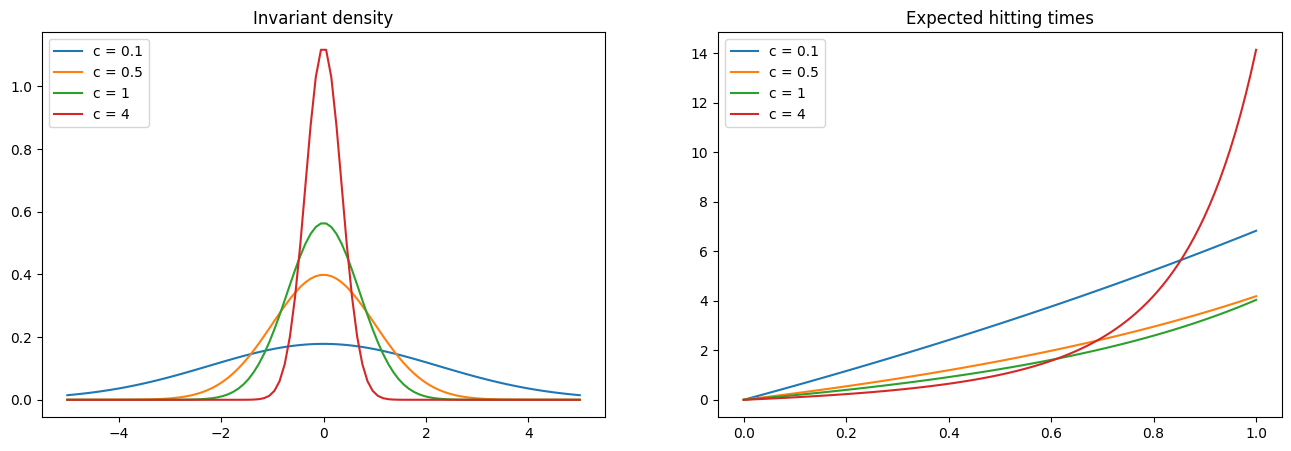

In [5]:
def b1(c):
    return lambda x: -c*x

cs = [1/10, 1/2, 1, 4]

drifts = [b1(c) for c in cs]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"c = {cs[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"c = {cs[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

Here we can clearly see that a higher drift influences the invariant density by making it more focused on the area around 0, and a lower drift flattens the distribution. Furhtermore, this also means that for a high slope value as the distribution is more centered around the expected hitting times increases much earlier compared to that of lower slope values.

# How does the intercept impact
Next, we will see how a linear drift function with varying slope and intercept will affect the invariant density and the expected hitting times.
To do se we will consider the drift function:
$$
b_2(x) = -cx + c, \quad \text{for} \quad c\in \{1/10, 1/2, 1, 4\}
$$
and 
$$
b_3(x) = -cx - c, \quad \text{for} \quad c\in \{1/10, 1/2, 1, 4\}
$$

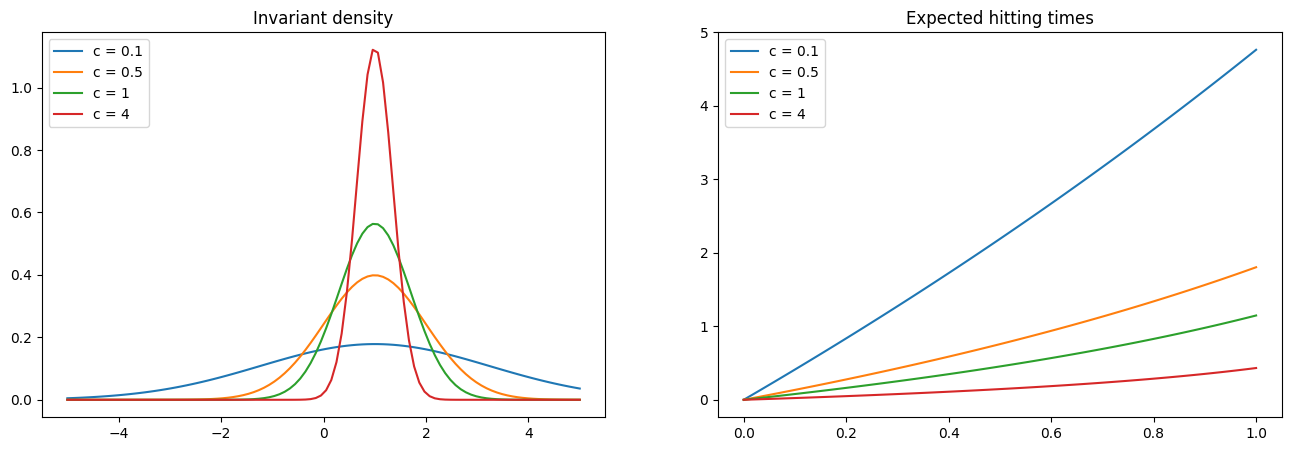

In [3]:
def b2(c):
    return lambda x: -c*x + c

cs = [1/10, 1/2, 1, 4]

drifts = [b2(c) for c in cs]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"c = {cs[i]}" )
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"c = {cs[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

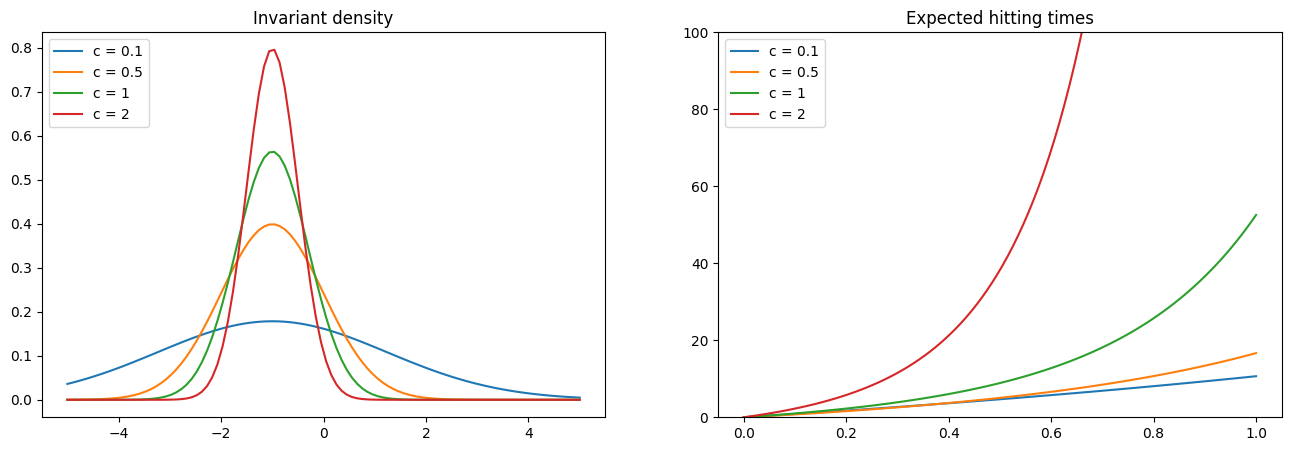

In [6]:
def b3(c):
    return lambda x: -c*x - c

cs = [1/10, 1/2, 1, 2]

drifts = [b3(c) for c in cs]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"c = {cs[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"c = {cs[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
ax[1].set_ylim([0, 100])
plt.show()

Here we see that all the intercept is doing is shifting the distributions to the right or to the left depending on whether it is a positive or negative interception. 
The shape of the distributions are the same, and therefore the relations between the invariant densitities and the expected hitting times are the same, but just shifted.

# How does A impact
Next, we will consider the second condition, where the drift function needs to ensure that if $|x|>A$, then the drift of the process should be opposite to the value of x. Meaning that if we are less than $-A$, then the drift should be positive, and if the process has a value higher than $A$, then the drift should be negative, thus ensuring that the process stays within a certain finite range, and always goes back towards zero.

To see how this might affect the process we will consider three cases:
$$
b_4(x) = \begin{cases}
    -cx & x\leq 0 \\
    0 & 0 < x \leq A \\
    -c(x-A) & x> A
\end{cases}
$$
$$
b_5(x) = \begin{cases}
    -c(x+A) & x< -A \\
    0 & -A \leq x \leq A \\
    -c(x-A) & x > A
\end{cases}
$$
$$
b_6(x) = \begin{cases}
    -c(x+A) & x< -A \\
    0 & -A < x < 0 \\
    -cx & x \geq 0
\end{cases}
$$
for $A \in \{0.1, 0.5, 1\}$ and with $C = 1/2$

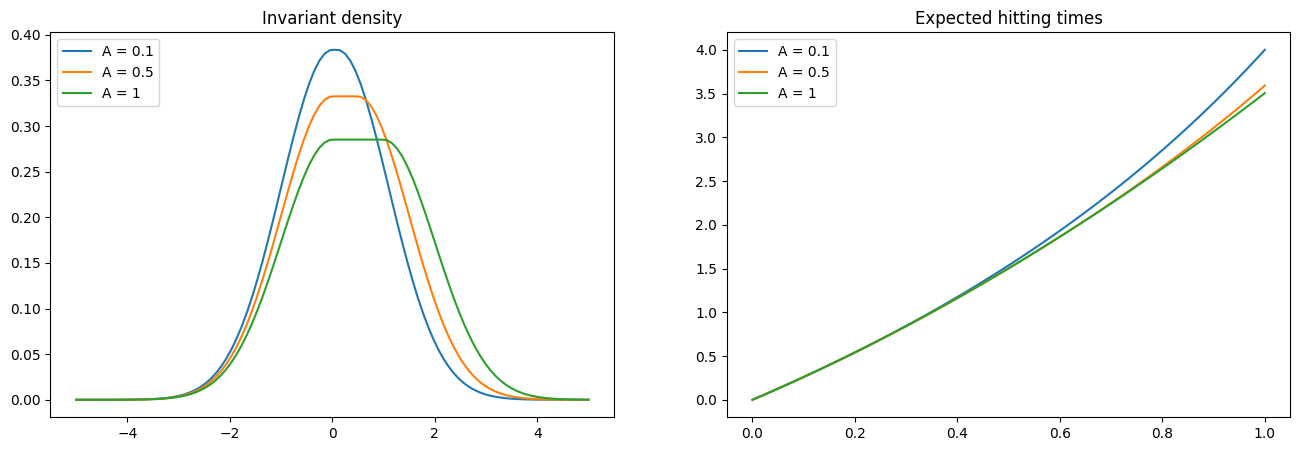

In [7]:
def b4(c, A):
    return lambda x: -c*x if x<=0 else (-c*(x-A) if x>A else 0)

c = 1/2
As = [0.1, 0.5, 1]

drifts = [b4(c, A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

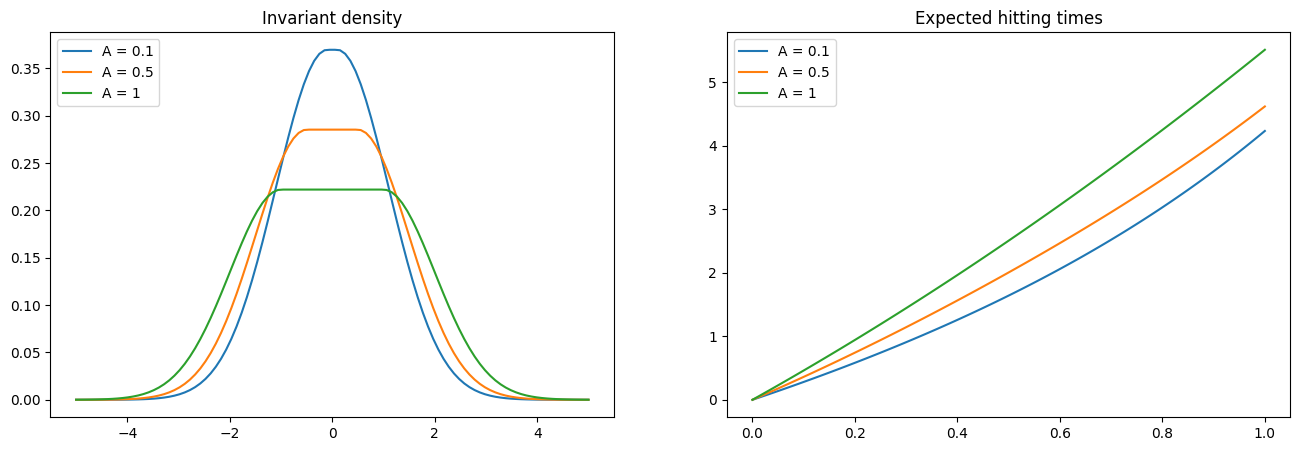

In [8]:
def b5(c, A):
    return lambda x: -c*(x+A) if x<=-A else (-c*(x-A) if x>A else 0)

c = 1/2
As = [0.1, 0.5, 1]

drifts = [b5(c, A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

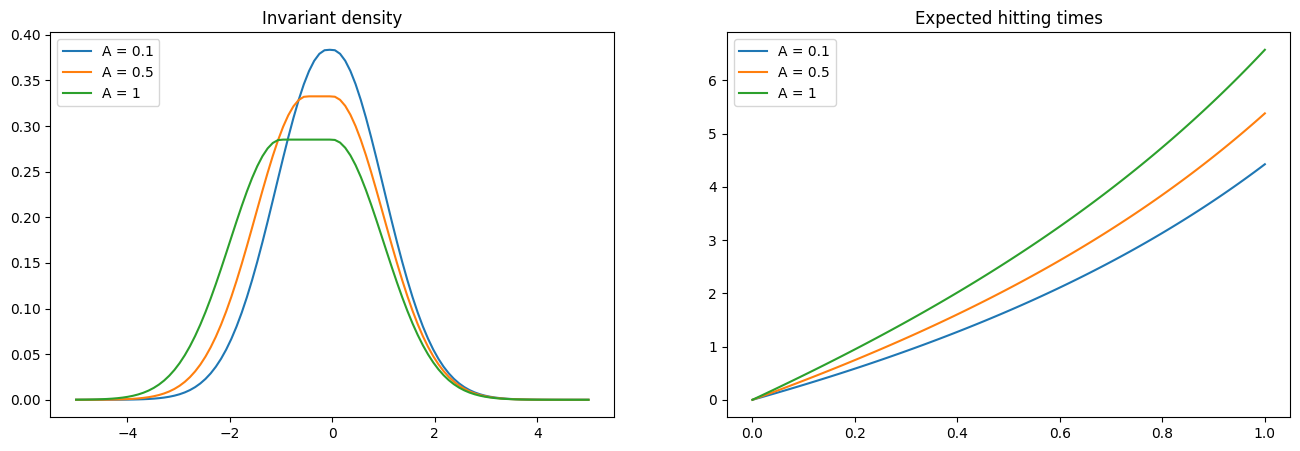

In [9]:
def b6(c, A):
    return lambda x: -c*(x+A) if x<=-A else (-c*x if x>0 else 0)

c = 1/2
As = [0.1, 0.5, 1]

drifts = [b6(c, A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

Firstly we can note that a higher value of $A$ flattens the peak of the distribution, which in turn makes it so a higher value of A gives lower expected hitting times, as the mass of the distribution is spread more around its center. Furhtermore, for $b_4$ and $b_6$ we can see that only have the value of $A$ influcence the one side of the drift shifts the distribution and makes the flatness of the peak less impactfull. Furtermore, the side of which the value of $A$ influences also affects the expected hitting times. In $b_6$ we see that the lower values of $A$ makes the expected hitting times grow later, while lower values of $A$ for $b_4$ makes it growth happen earlier. Nonetheless, the shape of the expected hitting times are not that impacted except for when $A$ affects both sides, where a higher value of $A$ makes the expected hitting times become more linear in the given interval.

We see through these tests that through the drift function we are able to affect the invariant density by making it more flat or more skewed, but in turn this only affects the expected hitting times through, when they start to increase and the shape of the increase. Both things can more or less be achieved by a simple linear drift as shown with $b_1$. Therefore, in the simulations I will consider a drift function of the form $b_1$ with $C \in \{1/10, 1/2, 4\}$

# Last quick test with $b_5$ but with different C values
The drift function considered here has the same form as the $b_5$, but where the C value is different for the case where $x<-A$ and $x>A$. As a quick test I choose to set the slope to be $1/2$, when the values of the process is less than -A and 2 when the value of the process is greater than A. 

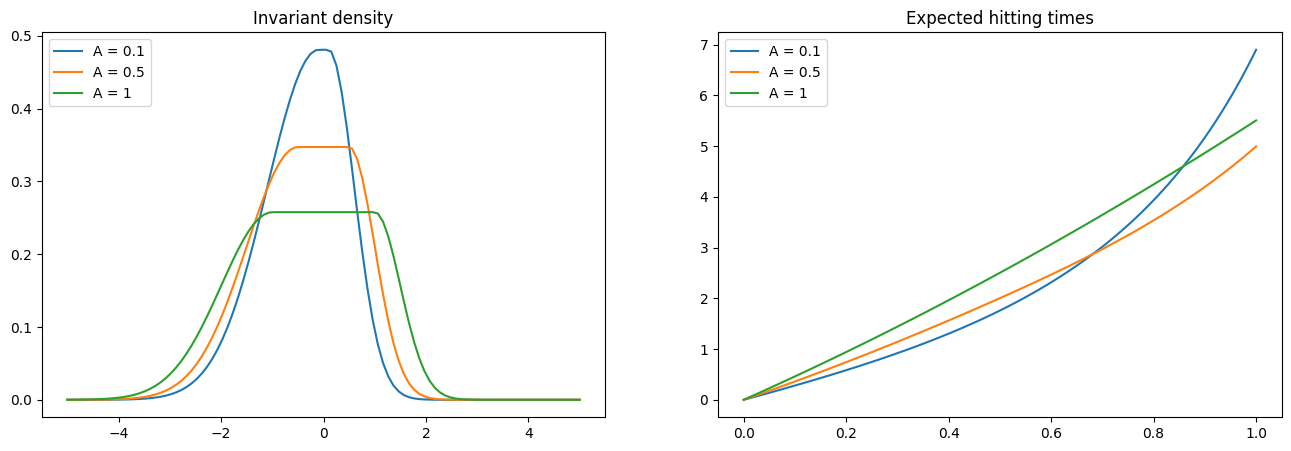

In [10]:
def b7(c1, c2, A):
    return lambda x: -c1*(x+A) if x<=-A else (-c2*(x-A) if x>A else 0)

c1 = 1/2
c2 = 2
As = [0.1, 0.5, 1]

drifts = [b7(c1, c2, A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

# Testing delayed ergodic property with linear drift inbetween

Taking $b_5$, but instead of having 0 drift between $-A$ and $A$, then we will have a linear drift with slope 1, so we consider
$$
b_8(x) = \begin{cases}
    -c(x+A) & x< -A \\
    x & -A \leq x \leq A \\
    -c(x-A) & x > A
\end{cases}.
$$
We will fix $c=1/2$ again, and use the same values for $A\in \{0.1, 0.5, 1\}$


c:\Uni\Data-driven-algorithms-for-Impulse-control-problem-Thesis\diffusionProcess.py:83: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(f, 0, x, epsabs=1e-3, limit=100)[0]


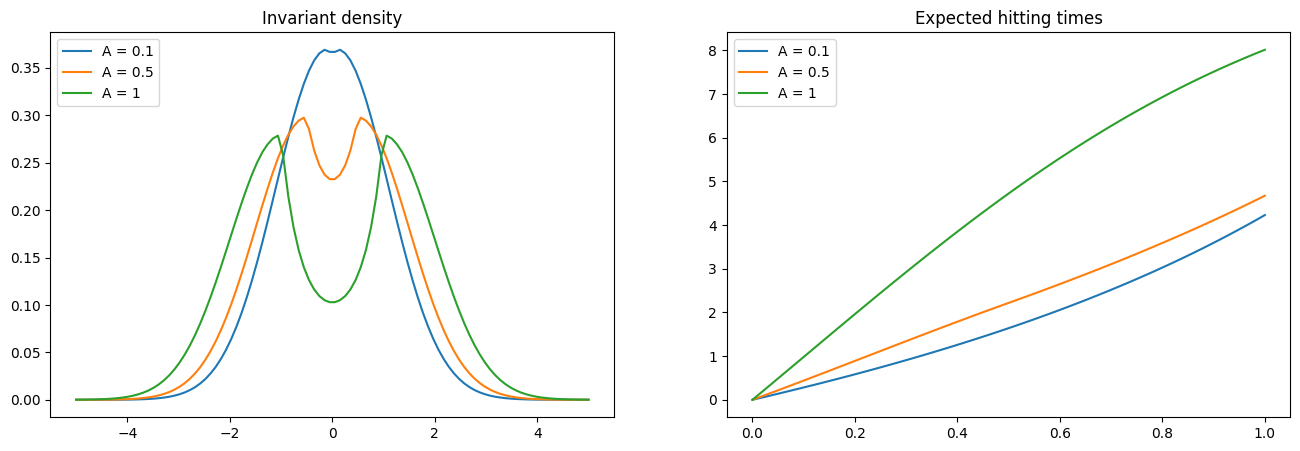

In [11]:
def b8(c, A):
    return lambda x: -c*(x+A) if x<=-A else (-c*(x-A) if x>A else x)

c = 1/2
As = [0.1, 0.5, 1]

drifts = [b8(c, A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

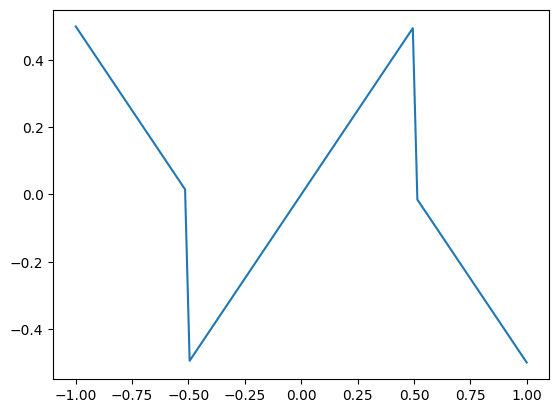

In [12]:
vals = np.linspace(-1,1,100)
d = b8(1,0.5)

ys = [d(y) for y in vals]
plt.plot(vals, ys)
plt.show()

Note: This is not a viable drift function since it is not locally lipschitz.

# Testing with sub-linear drift

Here we will test how having non-linear parts of the drift function will affect the invariant density and the expected hitting times.
The idea is that when we are 

c:\Uni\Data-driven-algorithms-for-Impulse-control-problem-Thesis\diffusionProcess.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2*np.array(list(map(partial(quad, f, 0, epsabs=1e-3, limit=100), x)))[:, 0]
c:\Uni\Data-driven-algorithms-for-Impulse-control-problem-Thesis\diffusionProcess.py:101: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 2*np.array(list(map(partial(quad, f, 0, epsabs=1e-3, limit=100), x)))[:, 0]


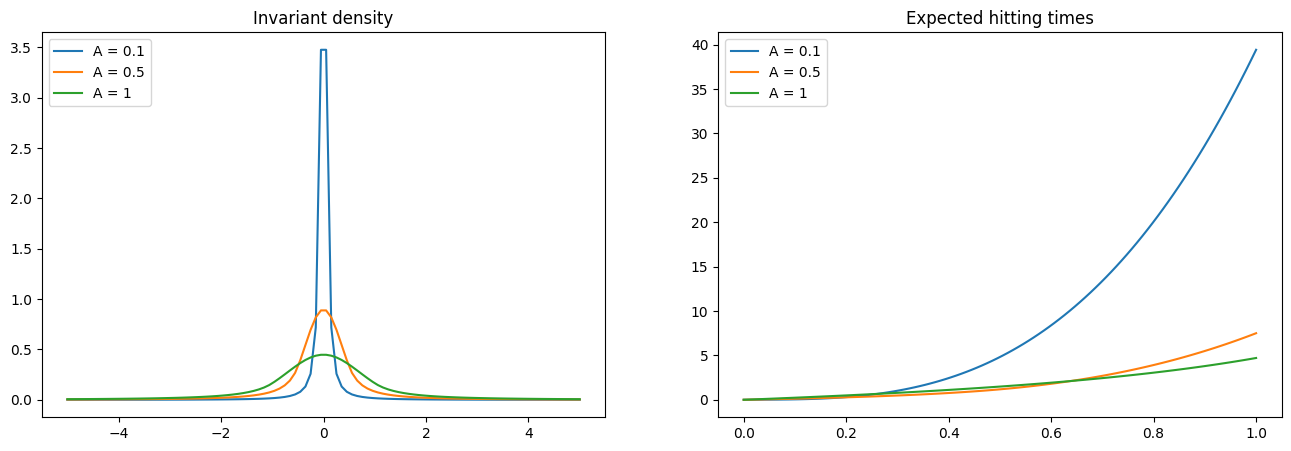

In [15]:
def b9(A):
    return lambda x: -1/x if x<-A else (-1/x if x>A else -x/A**2)

As = [0.1, 0.5, 1]

drifts = [b9(A) for A in As]
diffProsses = [DiffusionProcess(d, sigma) for d in drifts]

x_range_invariant = np.linspace(-5, 5, 100)
x_range_xi = np.linspace(0, 1, 100)
invariant_densities = [pros.invariant_density(x_range_invariant) for pros in diffProsses]
expected_hitting_times = [pros.xi(x_range_xi) for pros in diffProsses]

fig, ax = plt.subplots(1,2,figsize=(16,5))

for i, invariant_density in enumerate(invariant_densities):
    ax[0].plot(x_range_invariant, invariant_density, label=f"A = {As[i]}")
ax[0].legend(loc="upper left")
ax[0].set_title("Invariant density")
for i, expected_hitting_time in enumerate(expected_hitting_times):
    ax[1].plot(x_range_xi, expected_hitting_time, label=f"A = {As[i]}")
ax[1].legend(loc="upper left")
ax[1].set_title("Expected hitting times")
ax[1].ticklabel_format(style="plain")
#ax[1].set_ylim([0, 100])
plt.show()

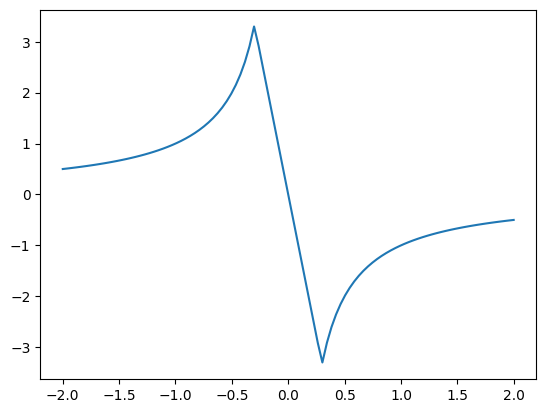

In [14]:
def b9(A):
    return lambda x: -1/x if x<-A else (-1/x if x>A else -x/A**2)

d = b9(0.3)

vals = np.linspace(-2,2,100)
ys = [d(v) for v in vals]
plt.plot(vals, ys)
plt.show()